<a href="https://colab.research.google.com/github/JorgeRuizEscorcia/kolb-styles-of-learning/blob/main/kolb_styles_of_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/Data_Kolb_2.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.drop('ID', axis=1)


In [ ]:
df.head()

,KOLB,CE TIPO A,LC TIPO A,RC TIPO A,CC TIPO A,GPA_TIPO A,GPA_CE,GPA_LC,GPA_RC,GPA_CC,...,CE TIPO C,LC TIPO C,RC TIPO C,CC TIPO C,GPA_TIPO C,CE TIPO D,LC TIPO D,RC TIPO D,CC TIPO D,GPA_TIPO D
0,ASIMILADOR,1.7,2.9,1.8,2.9,2.4,2.775,3.200,2.450,3.300,...,3.1,2.7,2.5,3.0,3.0,3.8,3.7,2.2,3.8,3.2
1,CONVERGENTE,3.3,3.1,2.3,3.1,3.2,3.450,3.225,3.150,3.725,...,3.8,2.7,3.3,4.2,3.6,3.8,4.0,4.0,4.0,4.0
2,ACOMODADOR,2.2,1.9,1.4,1.8,1.9,3.850,2.100,2.475,2.900,...,4.4,1.7,2.3,3.0,3.1,3.8,1.5,3.0,2.8,2.7
3,ACOMODADOR,3.1,1.9,1.3,1.0,1.8,3.425,2.475,2.850,3.125,...,5.0,2.5,2.5,3.7,3.4,2.5,2.0,4.3,4.0,3.4
4,ACOMODADOR,2.9,3.0,2.6,2.6,2.7,4.025,2.750,2.525,3.525,...,4.4,3.0,2.5,4.3,3.6,4.4,1.8,2.0,4.2,3.2


In [ ]:
df.dtypes

KOLB           object
CE TIPO A     float64
LC TIPO A     float64
RC TIPO A     float64
CC TIPO A     float64
GPA_TIPO A    float64
GPA_CE        float64
GPA_LC        float64
GPA_RC        float64
GPA_CC        float64
GPA_T         float64
CE TIPO B     float64
LC TIPO B     float64
RC TIPO B     float64
CC TIPO B     float64
GPA_TIPO B    float64
CE TIPO C     float64
LC TIPO C     float64
RC TIPO C     float64
CC TIPO C     float64
GPA_TIPO C    float64
CE TIPO D     float64
LC TIPO D     float64
RC TIPO D     float64
CC TIPO D     float64
GPA_TIPO D    float64
dtype: object

In [ ]:
#one_hot_encoded_data = pd.get_dummies(df, columns = ['KOLB'])
#print(one_hot_encoded_data)

In [ ]:
label = preprocessing.LabelEncoder()
df['KOLB']= label.fit_transform(df['KOLB'])
print(df['KOLB'].unique())
print(label.classes_)

[1 2 0 3]
['ACOMODADOR' 'ASIMILADOR' 'CONVERGENTE' 'DIVERGENTE']


In [ ]:
df3=df.loc[:,['KOLB',	'GPA_CE',	'GPA_LC',	'GPA_RC',	'GPA_CC', 'GPA_T'] ]

In [ ]:
df3.head()

,KOLB,GPA_CE,GPA_LC,GPA_RC,GPA_CC,GPA_T
0,1,2.775,3.200,2.450,3.300,2.93125
1,2,3.450,3.225,3.150,3.725,3.38750
2,0,3.850,2.100,2.475,2.900,2.83125
3,0,3.425,2.475,2.850,3.125,2.96875
4,0,4.025,2.750,2.525,3.525,3.20625


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

In [ ]:
df3 = pd.get_dummies(df3, columns=['KOLB'])

In [ ]:
df3.head()

,GPA_CE,GPA_LC,GPA_RC,GPA_CC,GPA_T,KOLB_0,KOLB_1,KOLB_2,KOLB_3
0,2.775,3.200,2.450,3.300,2.93125,False,True,False,False
1,3.450,3.225,3.150,3.725,3.38750,False,False,True,False
2,3.850,2.100,2.475,2.900,2.83125,True,False,False,False
3,3.425,2.475,2.850,3.125,2.96875,True,False,False,False
4,4.025,2.750,2.525,3.525,3.20625,True,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_names = ['GPA_CE', 'GPA_LC', 'GPA_RC', 'GPA_CC', 'GPA_T', 'KOLB_0',	'KOLB_1',	'KOLB_2',	'KOLB_3']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3)
df3_scaled = pd.DataFrame(X_scaled, columns=columns_names)


In [ ]:
df3.head()

,GPA_CE,GPA_LC,GPA_RC,GPA_CC,GPA_T,KOLB_0,KOLB_1,KOLB_2,KOLB_3
0,2.775,3.200,2.450,3.300,2.93125,False,True,False,False
1,3.450,3.225,3.150,3.725,3.38750,False,False,True,False
2,3.850,2.100,2.475,2.900,2.83125,True,False,False,False
3,3.425,2.475,2.850,3.125,2.96875,True,False,False,False
4,4.025,2.750,2.525,3.525,3.20625,True,False,False,False


In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
robust_df3 = pd.DataFrame(robust_scaler.fit_transform(df3), columns=df3.columns)
corr_matrix = robust_df3.corr()
corr_matrix["GPA_RC"].sort_values(ascending=False)


GPA_RC    1.000000
GPA_T     0.772104
GPA_LC    0.624109
GPA_CC    0.546559
GPA_CE    0.319624
KOLB_1    0.004765
KOLB_3    0.004029
KOLB_2   -0.002745
KOLB_0   -0.006188
Name: GPA_RC, dtype: float64

In [ ]:
corr_matrix = robust_df3.corr()
corr_matrix["KOLB_0"].sort_values(ascending=False)


KOLB_0    1.000000
GPA_CE    0.017381
GPA_RC   -0.006188
GPA_T    -0.008533
GPA_CC   -0.021094
GPA_LC   -0.029541
KOLB_2   -0.272140
KOLB_3   -0.439189
KOLB_1   -0.468713
Name: KOLB_0, dtype: float64

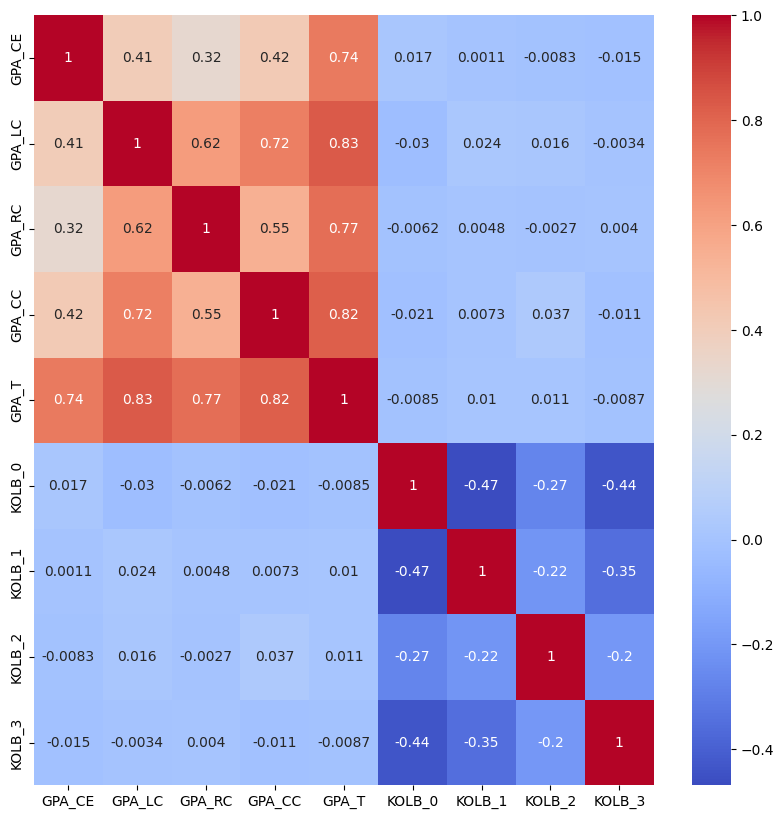

In [ ]:
corr_matrix_selected = robust_df3.corr()
#sns.heatmap(corr_matrix_selected, annot=True, cmap="coolwarm", figsize=(10, 10))
#sns.heatmap(corr_matrix_selected, annot=True, cmap="coolwarm", figsize=(10, 10), annot_kws={"fontsize":10})
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix_selected, annot=True, cmap="coolwarm", ax=ax)
plt.show()

In [ ]:
robust_df3.head()

,GPA_CE,GPA_LC,GPA_RC,GPA_CC,GPA_T,KOLB_0,KOLB_1,KOLB_2,KOLB_3
0,-0.500,0.60,-0.235294,0.148148,-0.084211,0.0,1.0,0.0,0.0
1,0.175,0.64,0.588235,0.777778,0.684211,0.0,0.0,1.0,0.0
2,0.575,-1.16,-0.205882,-0.444444,-0.252632,1.0,0.0,0.0,0.0
3,0.150,-0.56,0.235294,-0.111111,-0.021053,1.0,0.0,0.0,0.0
4,0.750,-0.12,-0.147059,0.481481,0.378947,1.0,0.0,0.0,0.0


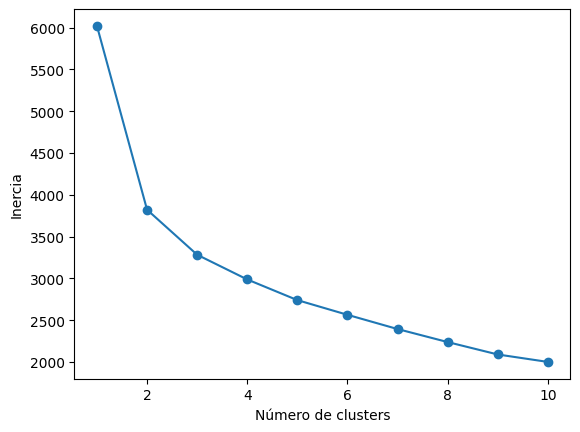

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(robust_df3)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(robust_df3)

robust_df3['cluster'] = kmeans.labels_

robust_df3.groupby('cluster').mean()


,GPA_CE,GPA_LC,GPA_RC,GPA_CC,GPA_T,KOLB_0,KOLB_1,KOLB_2,KOLB_3
cluster,,,,,,,,,
0,-0.668018,-0.879640,-0.640898,-1.003837,-1.016904,0.362613,0.261261,0.101351,0.274775
1,-0.091275,-0.020537,-0.036419,-0.022620,-0.052773,0.000000,0.446309,0.187919,0.365772
2,-0.015657,-0.054227,0.023651,-0.035987,-0.012100,1.000000,0.000000,0.000000,0.000000
3,0.577571,0.733742,0.670485,0.597455,0.856570,0.330416,0.282276,0.115974,0.271335


<Figure size 60000x40000 with 0 Axes>

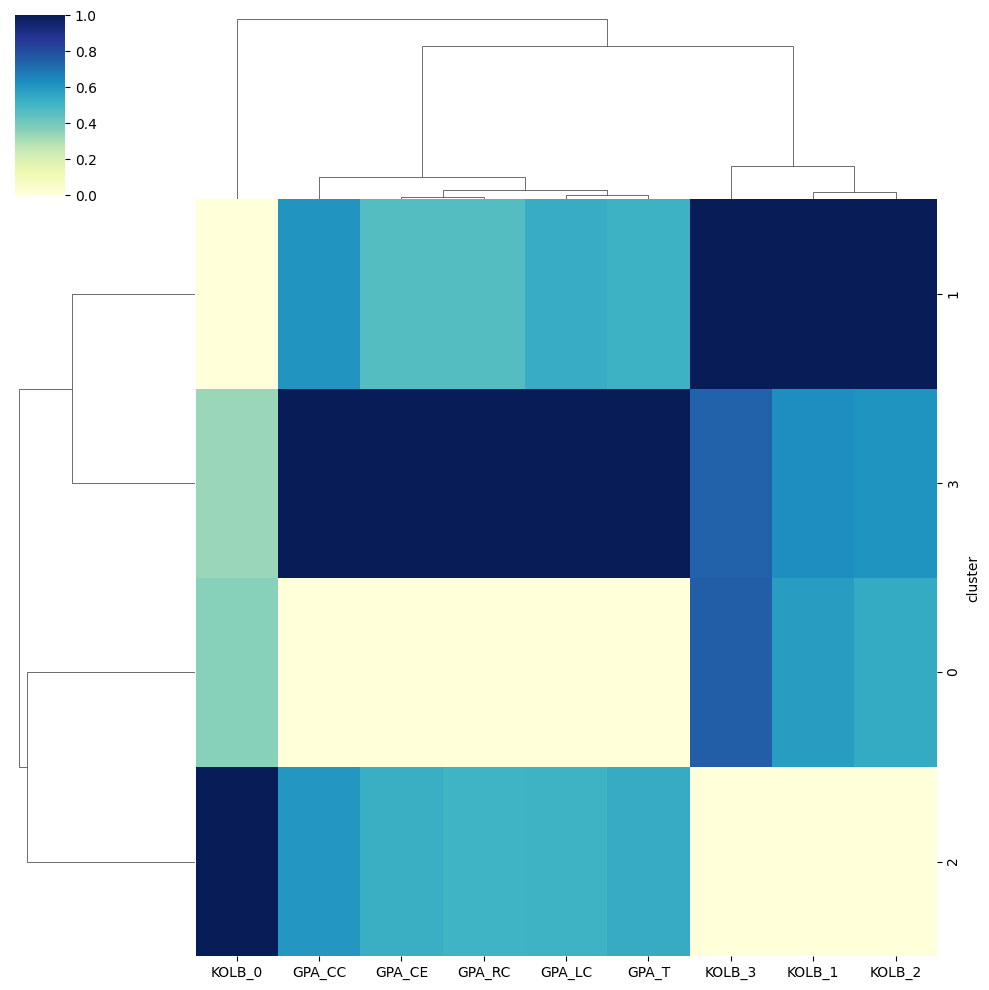

In [ ]:
plt.figure(figsize=(600, 400))
sns.clustermap(
    robust_df3.groupby('cluster').mean(),
    cmap='YlGnBu',
    standard_scale=1
)

plt.show()

